In [49]:
import pandas as pd
import nltk
df = pd.read_csv('Results.csv')
#df['comments'] = df['comments'].astype('string')
df[:5]

,Unnamed: 0,Date,comments
0,0,"March 24, 2002 10:54PM",I personally think that with a few tweaks the ...
1,1,"March 25, 2002 12:06AM",I am debating a new purchase and these two are...
2,2,"March 25, 2002 10:02AM","Great handling, RWD, excellent engine and the ..."
3,3,"March 25, 2002 4:04PM",And no manual tranny. That may not matter to y...
4,4,"March 25, 2002 5:44PM",One beauty of BMW 3 Series is that there are s...


In [50]:
df['comments'] = df['comments'].astype('string')
#df["comments"] = df["comments"].str.replace('[^\w\s]','')
df.dropna(inplace=True)
df['Tokens'] = df['comments'].apply(nltk.tokenize.word_tokenize)
df[:-5]

,Unnamed: 0,Date,comments,Tokens
0,0,"March 24, 2002 10:54PM",I personally think that with a few tweaks the ...,"[I, personally, think, that, with, a, few, twe..."
1,1,"March 25, 2002 12:06AM",I am debating a new purchase and these two are...,"[I, am, debating, a, new, purchase, and, these..."
2,2,"March 25, 2002 10:02AM","Great handling, RWD, excellent engine and the ...","[Great, handling, ,, RWD, ,, excellent, engine..."
3,3,"March 25, 2002 4:04PM",And no manual tranny. That may not matter to y...,"[And, no, manual, tranny, ., That, may, not, m..."
4,4,"March 25, 2002 5:44PM",One beauty of BMW 3 Series is that there are s...,"[One, beauty, of, BMW, 3, Series, is, that, th..."
...,...,...,...,...
4990,4990,"January 23, 2006 5:01PM",I agree with Blue. You don't always use availa...,"[I, agree, with, Blue, ., You, do, n't, always..."
4991,4991,"January 23, 2006 5:15PM",I was curious as to whether or not a DVD based...,"[I, was, curious, as, to, whether, or, not, a,..."
4992,4992,"January 23, 2006 6:29PM",The Infiniti M does in the optional Journey pa...,"[The, Infiniti, M, does, in, the, optional, Jo..."
4993,4993,"January 23, 2006 7:31PM",I would agree w/ bdr127. I have a C280 w/ AWD...,"[I, would, agree, w/, bdr127, ., I, have, a, C..."


In [63]:
word_dict=dict()

for row in df['Tokens']:
    for word in row:
        if word.lower() in word_dict:
            word_dict[word.lower()] += 1
        else:
            word_dict[word.lower()] = 1
list_orderd = []
sort_word_dict = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)
print(sort_word_dict)     

[('the', 26770), ('.', 25635), (',', 19460), ('i', 12512), ('a', 12080), ('and', 10714), ('to', 9895), ('is', 8094), ('of', 7139), ('it', 7079), ('in', 6741), ('that', 6516), ('you', 5469), ('for', 4562), ('car', 3937), ('with', 3884), ("'s", 3876), ('not', 3502), ('but', 3473), ("n't", 3396), ('on', 3353), (')', 3246), ('have', 3234), ('?', 3156), ('are', 3097), ('my', 2951), ('as', 2908), ('(', 2825), ("''", 2524), ('be', 2523), ('``', 2441), ('do', 2417), ('they', 2333), ('or', 2261), ('if', 2171), ('was', 2157), ('bmw', 1959), ('cars', 1959), ('at', 1938), ('this', 1936), ('tl', 1861), ('...', 1848), ('about', 1807), ('like', 1792), ('all', 1781), ('more', 1773), (':', 1742), ('what', 1698), ('than', 1636), ('an', 1629), ('would', 1604), ('one', 1568), ('can', 1565), ('so', 1543), ('just', 1531), ('-', 1522), ('has', 1498), ('me', 1481), ('!', 1444), ('will', 1426), ('g35', 1367), ('there', 1304), ('out', 1301), ('get', 1295), ('your', 1248), ('$', 1239), ('from', 1227), ('think', 

In [64]:
x = []
y = []
count = 1
for k, v in sort_word_dict:
    if count<=100:
        x.append(v)
        y.append(count)
        count+=1
        
print(x)
print(y)

[26770, 25635, 19460, 12512, 12080, 10714, 9895, 8094, 7139, 7079, 6741, 6516, 5469, 4562, 3937, 3884, 3876, 3502, 3473, 3396, 3353, 3246, 3234, 3156, 3097, 2951, 2908, 2825, 2524, 2523, 2441, 2417, 2333, 2261, 2171, 2157, 1959, 1959, 1938, 1936, 1861, 1848, 1807, 1792, 1781, 1773, 1742, 1698, 1636, 1629, 1604, 1568, 1565, 1543, 1531, 1522, 1498, 1481, 1444, 1426, 1367, 1304, 1301, 1295, 1248, 1239, 1227, 1215, 1128, 1081, 1010, 987, 967, 964, 954, 948, 944, 934, 931, 921, 916, 896, 894, 888, 882, 866, 865, 844, 841, 830, 811, 807, 770, 765, 746, 744, 739, 738, 734, 733]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


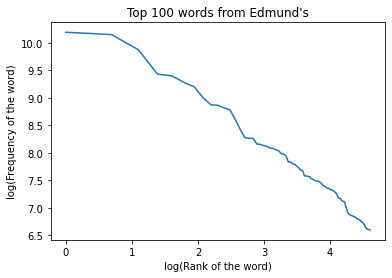

In [65]:
from matplotlib import pyplot as plt
import numpy as np
plt.plot(np.log(y),np.log(x))
plt.title("Top 100 words from Edmund's")
plt.xlabel("log(Rank of the word)")
plt.ylabel("log(Frequency of the word)");
plt.show()

## Top 10 brands

In [66]:
models = pd.read_csv('car_models.csv')
models['Brand'] = models['Brand'].astype('string')
models['Model'] = models['Model'].astype('string')
models['Model'].apply(str.lower)
models['Brand'].apply(str.lower)
models[:5]

,Brand,Model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx


In [68]:
print(word_dict['acura'])

537


In [76]:
def removing_models(x):
    if str(x['Model']) in word_dict_copy.keys():
        print('HI')
        if str(x['Brand']) in word_dict_copy.keys():  
             print(x['Brand'])  
             print(word_dict_copy[x['Brand']])
             word_dict_copy[x['Brand']] = word_dict_copy[x['Brand']]+word_dict_copy[x['Model']]
             print('after addition')
             print(word_dict_copy[x['Brand']])
             del word_dict_copy[x['Model']]
        else:
             word_dict[x['Brand']] = word_dict[x['Model']]                                  

word_dict_copy = word_dict.copy()                                               
models.apply(removing_models, axis=1)      
    

HI
acura
537
after addition
564
HI
acura
564
after addition
578
HI
acura
578
after addition
580
HI
acura
580
after addition
593
HI
acura
593
after addition
906
HI
acura
906
after addition
928
HI
audi
379
after addition
429
HI
audi
429
after addition
756
HI
audi
756
after addition
815
HI
audi
815
after addition
816
HI
audi
816
after addition
828
HI
audi
828
after addition
878
HI
bmw
1959
after addition
2147
HI
bmw
2147
after addition
2196
HI
bmw
2196
after addition
2198
HI
bmw
2198
after addition
2201
HI
bmw
2201
after addition
2217
HI
bmw
2217
after addition
2267
HI
bmw
2267
after addition
2299
HI
bmw
2299
after addition
2300
HI
bmw
2300
after addition
2321
HI
bmw
2321
after addition
2326
HI
bmw
2326
after addition
2332
HI
bmw
2332
after addition
2342
HI
bmw
2342
after addition
2344
HI
bmw
2344
after addition
2448
HI
bmw
2448
after addition
2659
HI
bmw
2659
after addition
2668
HI
bmw
2668
after addition
2810
HI
buick
25
after addition
31
HI
buick
31
after addition
33
HI
buick
33
after 

0      None
1      None
2      None
3      None
4      None
       ... 
525    None
526    None
527    None
528    None
529    None
Length: 530, dtype: object

In [77]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

for word in stop_words:
    if word in word_dict_copy.keys():
        del word_dict_copy[word]



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
brands = pd.DataFrame.from_dict(word_dict_copy, orient='index', columns = ['Count'])
#print(models.index)
brands = brands[brands.index.isin(models['Brand'])]
#models[:5]
brands.sort_values(by='Count', ascending=False, inplace=True)
brands[:10]

,Count
car,5896
bmw,2810
sedan,947
acura,928
audi,878
mercedes benz,672
honda,648
infiniti,574
nissan,502
toyota,419
